In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Basic Data Cleaning

In [3]:
## As per domain knowledge we do not need day, month, year
df.drop(columns = ['day','month','year'], inplace = True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [5]:
## removing the white spaces 

df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [6]:
## Encoding the Classes 

## Making a map for data encoding
encoded = {
    'not fire' : 0,
    'fire' : 1
}

df['Classes'] = df['Classes'].map(encoded)
df['Classes'].value_counts()


### One more way to do this is :- df['classes'] = np.where(df['classes'].str.contains('not fire'), 0, 1)

Classes
1    137
0    106
Name: count, dtype: int64

# Dividing into Independent and Dependent Features

In [7]:
X = df.drop('FWI', axis = True)   ## We are not doing this inplace 
y = df['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
X_train.shape, y_train.shape

((182, 11), (182,))

# Feature Selection : Based on Correlation

### Two Independent features must not be highly correlated to each other

In [14]:
corr = X_train.corr()
corr ## corr is also a dataFrame

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

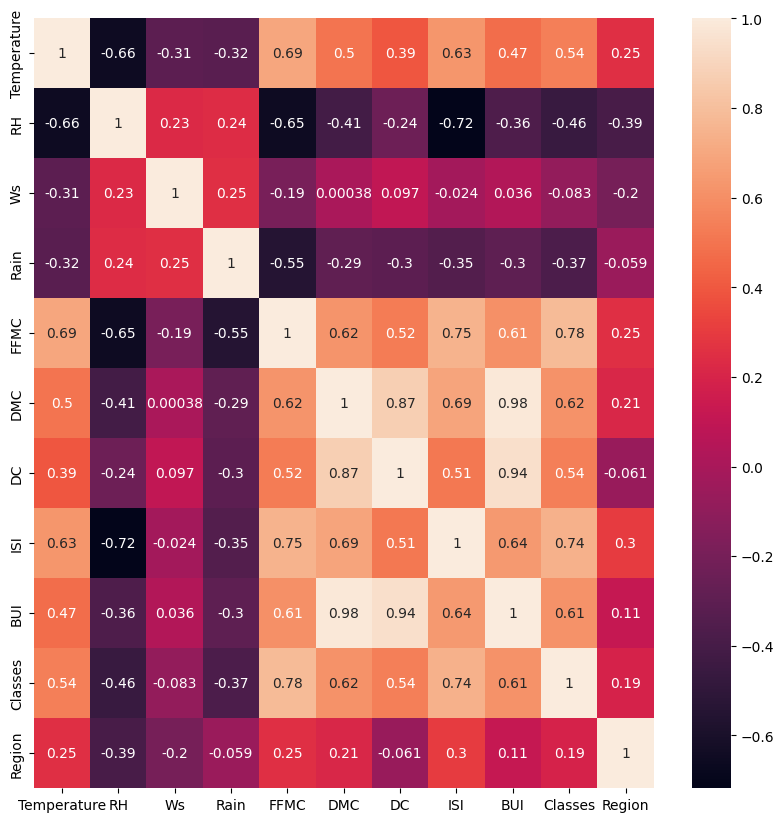

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [16]:
## Checking the multicollinearity
## We define a function to find features with correlation above a specified threshold. These features can be candidates for removal to reduce multicollinearity.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    ## Here we are iterating over the lower triangle of corr_matrix. 
    # .
    # . .
    # . . .
    ## If we iterate over entire matrix then both the correlated columns will be added in the set.
    ## But we want only one of those highly correlated columns to go in the set
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
## Threshold is set up by the domain expert

drop_columns = correlation(X_train, 0.85)
drop_columns

{'BUI', 'DC'}

In [18]:
X_train.drop(columns=list(drop_columns), inplace=True)
X_test.drop(columns=list(drop_columns), inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Standardization : Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [20]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [21]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## After scaling the X_train and X_test become numpy arrays 

In [22]:
print(type(X_train_scaled))
print(type(X_test_scaled))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### If it is a polynomial regression then at this step you can do the Polynomial Transformation

In [23]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

<Axes: >

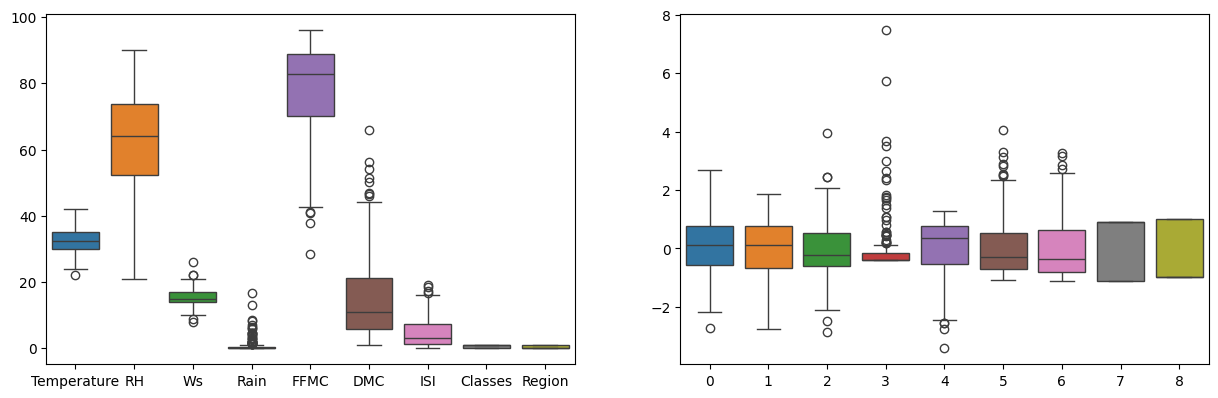

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data = X_train)

plt.subplot(2,2,2)
sns.boxplot(data = X_train_scaled)


#### After scaling all the column values get a common center of mean = 0 and std dev as 1

# Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = lin_reg.predict(X_test_scaled)
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

### Evaluation of Linear Regression

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae, score

(0.546823646524997, 0.9847657384266951)

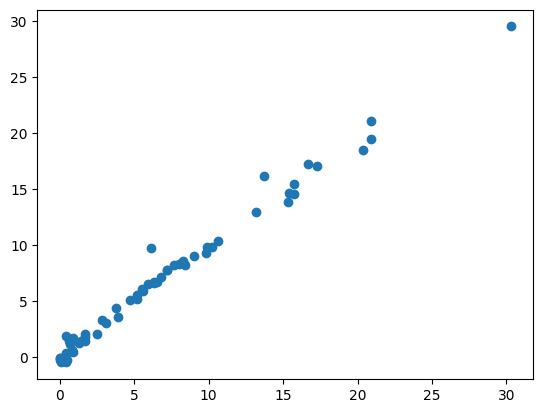

In [29]:
plt.scatter(y_test, y_pred)

# Lasso Regression Model

In [30]:
from sklearn.linear_model import Lasso  ## Here the alpha value is by default 1.0
lasso_reg = Lasso()

In [31]:
lasso_reg.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [32]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)
y_pred_lasso

array([ 7.84570511,  7.4760351 ,  1.06280248,  5.57182566,  7.15885302,
        2.98472993,  3.29585571,  7.88757659,  2.64885633,  3.93029159,
        1.49954269,  9.90939713,  9.38584995, 15.7567602 , 16.31754696,
        2.94285845,  2.56817739, -0.40623463,  7.0973165 ,  4.05837568,
        2.78651163,  0.83183302,  6.46086185,  0.80409291, 19.21068568,
        5.76645732,  5.86530516,  9.16901185, -0.64326039,  9.83769504,
        6.56628861,  1.06684001,  9.62691324, 13.06176805,  2.57722597,
        2.28322385,  2.59487225,  6.44426082,  0.37191286,  0.3915779 ,
        6.32171041,  2.93276462,  8.11248975, -0.54845009, 14.49798226,
        7.96825553,  8.55326749,  2.03662688, 12.4409409 ,  1.88633635,
       25.87619242,  6.07660958, 15.93875663, 17.14160346, 12.52311598,
       14.3603987 ,  2.35836911,  9.12915914,  4.68421388, 13.65732474,
        5.85117379])

### Evaluation of Lasso Regression

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
lasso_score = r2_score(y_test, y_pred_lasso)
mae_lasso, lasso_score

(1.133175994914409, 0.9492020263112388)

This is the testing accuracy. Aim of lasso regression is to reduce the training accuracy and not testing accuracy. But still here testing accuracy got reduced means our Linear Regression model was never overfitting

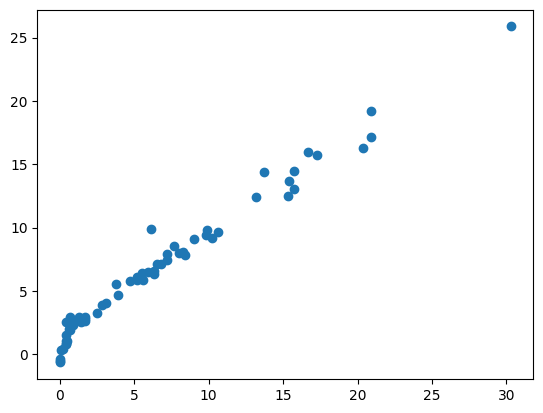

In [34]:
plt.scatter(y_test, y_pred_lasso)

# Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge ## alpha is by default 1.0
ridge_reg = Ridge()

In [36]:
ridge_reg.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [37]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_ridge

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

### Evaluation of Ridge Regression

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
ridge_score = r2_score(y_test, y_pred_ridge)
mae_ridge, ridge_score

(0.5642305340105691, 0.9842993364555513)

This is the testing accuracy. Aim of ridge regression is to reduce the training accuracy and not testing accuracy. But still here testing accuracy got reduced means our Linear Regression model was never overfitting

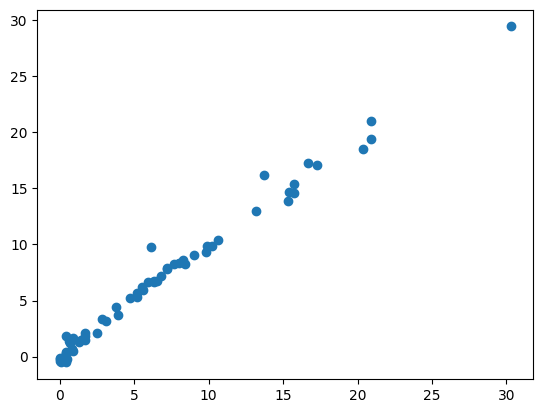

In [39]:
plt.scatter(y_test, y_pred_ridge)

# ElasticNet Regression Model

In [40]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet()

In [41]:
elastic_reg.fit(X_train_scaled, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [42]:
y_pred_elastic = elastic_reg.predict(X_test_scaled)
y_pred_elastic

array([ 8.440192  ,  8.48416748,  1.58398174,  5.74704744,  7.99925012,
        3.84543773,  4.65423145,  9.85746701,  2.41164568,  4.42033198,
        1.69311557,  9.29479476,  9.94989153, 14.80040551, 14.99184886,
        3.85114187,  2.99061658, -0.97985369,  7.64927581,  6.40186267,
        2.76037744,  0.786395  ,  7.65023687,  1.04550366, 17.05166573,
        8.10156058,  7.10480686,  9.72405017, -1.63030854,  9.98040215,
        6.77739365,  1.80475174,  9.66423333, 12.61018368,  3.22848878,
        2.95760651,  4.2159643 ,  8.47055095, -0.0452998 , -0.22390909,
        8.07425176,  3.59582409,  9.01788865, -1.00255442, 13.98138726,
        8.47227471,  8.66221408,  2.37166362, 12.20709739,  2.13892487,
       22.42259827,  8.36459938, 14.18257366, 15.41045041, 12.03375106,
       13.32632753,  3.23749418,  9.62446446,  5.98090909, 13.781952  ,
        7.4239577 ])

### Evaluation of ElasticNet Regression

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
elastic_score = r2_score(y_test, y_pred_elastic)
mae_elastic, elastic_score

(1.8822353634896, 0.8753460589519703)

This is the testing accuracy. Aim of elasticnet regression is to reduce the training accuracy and not testing accuracy. But still here testing accuracy got reduced means our Linear Regression model was never overfitting

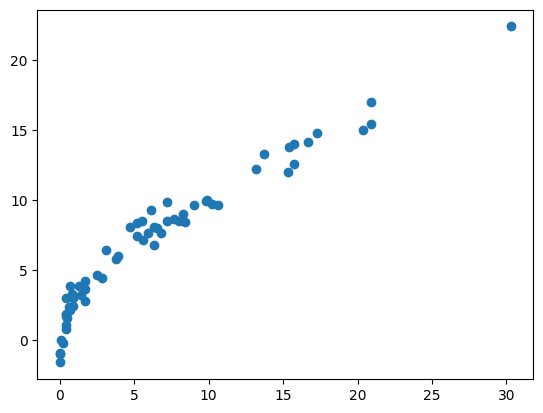

In [44]:
plt.scatter(y_test, y_pred_elastic)

# Hyperparameter Tuning

### Lasso Cross Validation

In [45]:
from sklearn.linear_model import LassoCV
lassocv_reg = LassoCV(cv = 5)  ## By default it takes 5 folds

In [46]:
lassocv_reg.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [65]:
lassocv_reg.alphas

'warn'

In [49]:
lassocv_reg.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [50]:
lassocv_reg.alpha_

np.float64(0.05725391318234408)

In [47]:
y_pred_lassocv = lassocv_reg.predict(X_test_scaled)
y_pred_lassocv

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [51]:
lassocv_reg.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

In [52]:
lassocv_reg.mse_path_   

# There are 100 alphas
# for each alpha 5 cross validations i.e. 5 mean_absolute_error
# thus total mean_absolute_error = 5 * 100 = 500

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

#### Evaluation 

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_lassocv = mean_absolute_error(y_test, y_pred_lassocv)
lassocv_score = r2_score(y_test, y_pred_lassocv)
mae_lassocv, lassocv_score

(0.6199701158263431, 0.9820946715928275)

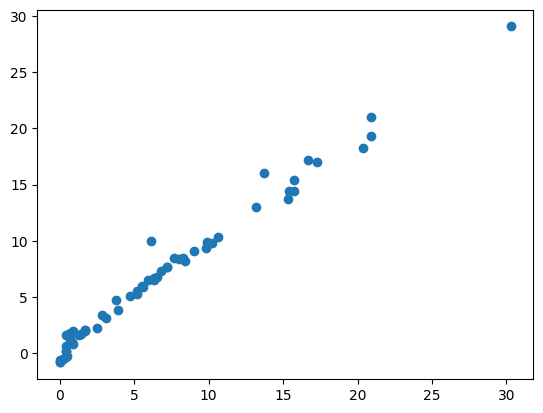

In [54]:
plt.scatter(y_test, y_pred_lassocv)

### Ridge Cross Validation

In [55]:
from sklearn.linear_model import RidgeCV
ridgecv_reg = RidgeCV(cv = 5) ## If cv is none then by default it performs Leave One out Cross Validation

In [56]:
ridgecv_reg.fit(X_train_scaled, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [60]:
ridgecv_reg.alphas  ## alphas: Array of alpha values to try.

(0.1, 1.0, 10.0)

In [64]:
ridgecv_reg.alpha_

np.float64(1.0)

In [61]:
ridgecv_reg.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

In [57]:
y_pred_ridgecv = ridgecv_reg.predict(X_test_scaled)
y_pred_ridgecv

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

#### Evaluation

In [62]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_ridgecv = mean_absolute_error(y_test, y_pred_ridgecv)
ridgecv_score = r2_score(y_test, y_pred_ridgecv)
mae_ridgecv, ridgecv_score

(0.5642305340105691, 0.9842993364555513)

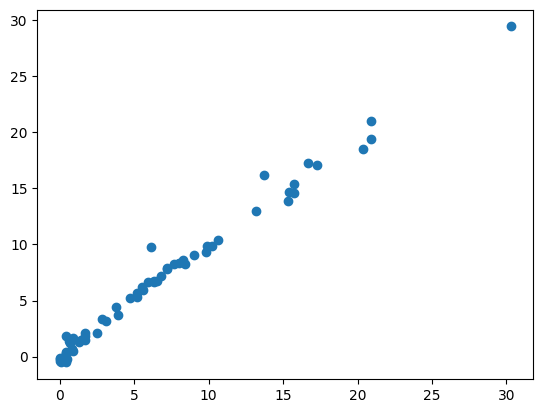

In [63]:
plt.scatter(y_test, y_pred_ridgecv)

### ElasticNet Cross Validation

In [66]:
from sklearn.linear_model import ElasticNetCV
elasticcv_reg = ElasticNetCV(cv = 5) ## By default it uses 5 folds

In [67]:
elasticcv_reg.fit(X_train_scaled, y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [71]:
elasticcv_reg.alpha_

np.float64(0.04311146156383891)

In [72]:
elasticcv_reg.alphas

'warn'

In [73]:
elasticcv_reg.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [68]:
y_pred_elasticcv = elasticcv_reg.predict(X_test_scaled)
y_pred_elasticcv

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

#### Evaluation

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score
mae_elasticcv = mean_absolute_error(y_test, y_pred_elasticcv)
elasticcv_score = r2_score(y_test, y_pred_elasticcv)
mae_elasticcv, elasticcv_score

(0.6575946731430901, 0.9814217587854941)

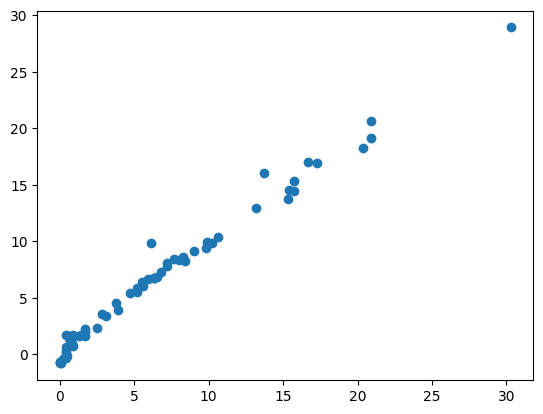

In [70]:
plt.scatter(y_test, y_pred_elasticcv)